# Airfare Price Prediction

* Statement of Issue 
    It can be hard to guess airline ticket rates, we might see a fare today, find out the price of the same flight tomorrow, it's going to be a different story. We may have heard travelers sometimes complain that the costs of airline fares are too volatile. As data scientists, we can show that something can be expected provided the correct data. 

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Important library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Import Dataset

In [2]:
df = pd.read_excel(r'C:\Users\bhaum\Python 12-8-22\Home learning\Machine learning\Project\Python_Flight_Fare_d.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Chech basic information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
for var in df.columns:
    print(df[var].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


##  Check the null values in Dataset

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* There is only two null values in whole dataset
* for that big data there is not much effect to dataset if we drop the null values raw line

##  Remove the null values from the dataset

In [9]:
df.dropna(inplace= True)

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Preparation
* As per you see in this data. All data are in object form and you can't see any relation between columns.
* To get the relation and run the ML process first we need to do The Data Preparation

#  Handaling Numerical value

* As you can see the Date_of_Journey column for that we will seperate the Date and month for the furthere process but the object column can't sepreted

In [11]:
df['journy_day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [12]:
df['journy_month'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


##  There is another same column Dep_Time

* We will do the same thing for this column

In [16]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time',axis=1,inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


 * We can use same function for the Arrival_Time

In [18]:
df['Arr_Hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arr_Minute'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)

## Now we will do the process in Duration column 
* Fro Duration column the values in two diffrent way where some values only have hour or some have only minute

In [19]:
duration = list(df['Duration'])

In [20]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [21]:
Duration_hour = []
Duration_minute = []

for i in range(len(duration)):
    Duration_hour.append(duration[i].split('h')[0])
    Duration_minute.append(duration[i].split('m')[0].split('h')[1])

In [22]:
df['Duration_hour'] = Duration_hour
df['Duration_minute'] = Duration_minute

In [23]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [24]:
df.drop('Duration',axis=1,inplace=True)

In [25]:
df.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handaling Categorical value 

* first of all we will see the Airline column

In [26]:
df['Airline'].unique()            # we have diffrent type of flight

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [27]:
df['Airline'].value_counts()  # The total number of diffrent flight is here

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

* for deciding the encoding process we need to see the effect of target by this column

###  Price according to the Flight company

In [28]:
sns.set()

<AxesSubplot: xlabel='Airline'>

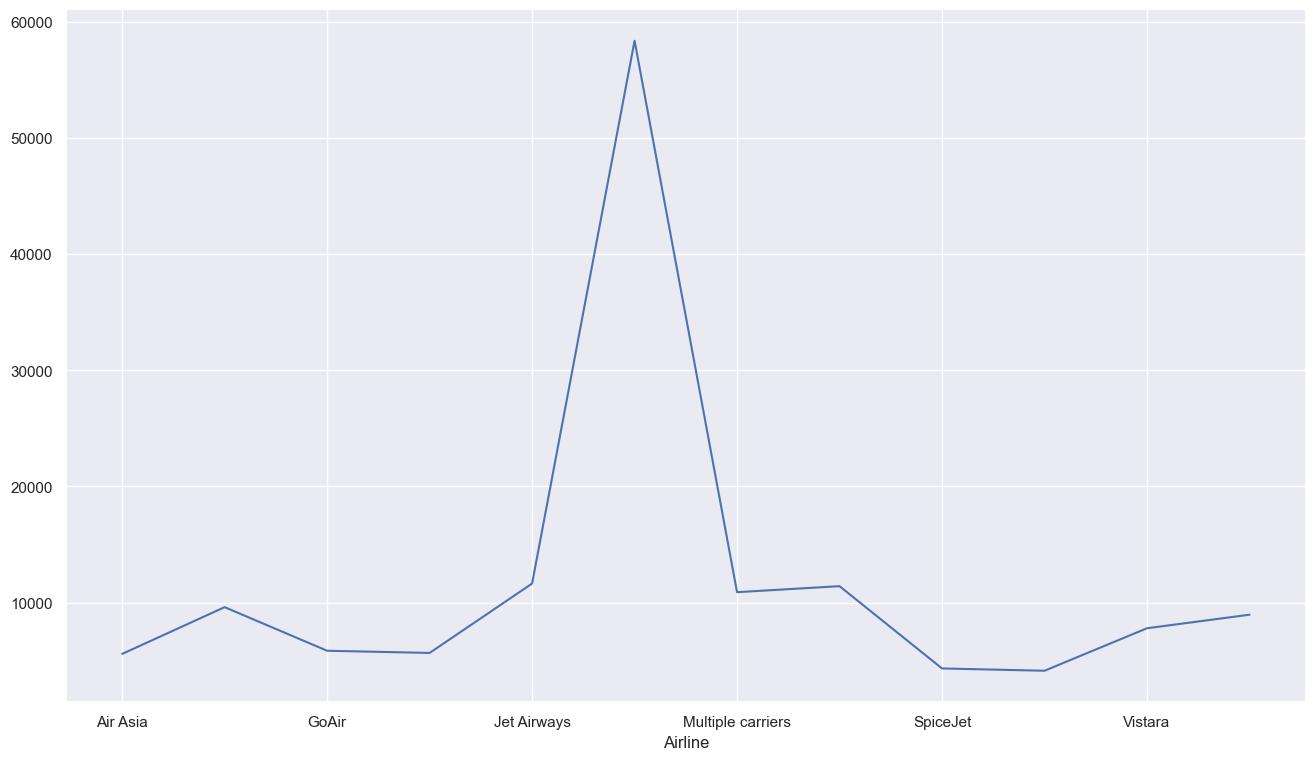

In [29]:
df.groupby('Airline')['Price'].mean().plot(figsize=(16,9))

# Check the average price according to Airline 

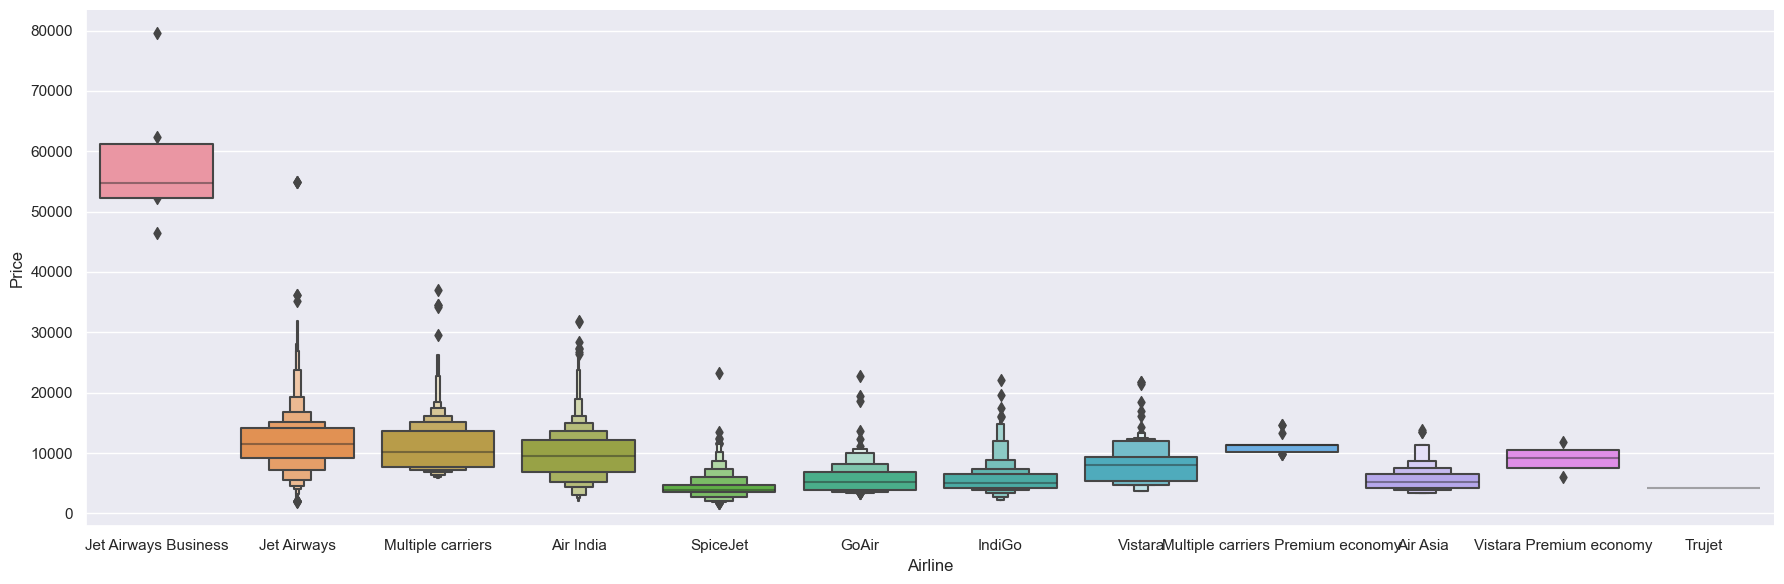

In [30]:
sns.catplot(y= 'Price' , x = 'Airline', data= df.sort_values('Price',ascending= False), kind="boxen", height = 6, aspect =3 )
plt.show()

* Here we can see that price are vary with the airline so we will do OneHot encoding

In [31]:
Airline = df[['Airline']]

Airline = pd.get_dummies(Airline,drop_first=True)

In [32]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


# Price according to the Source 

<AxesSubplot: xlabel='Source'>

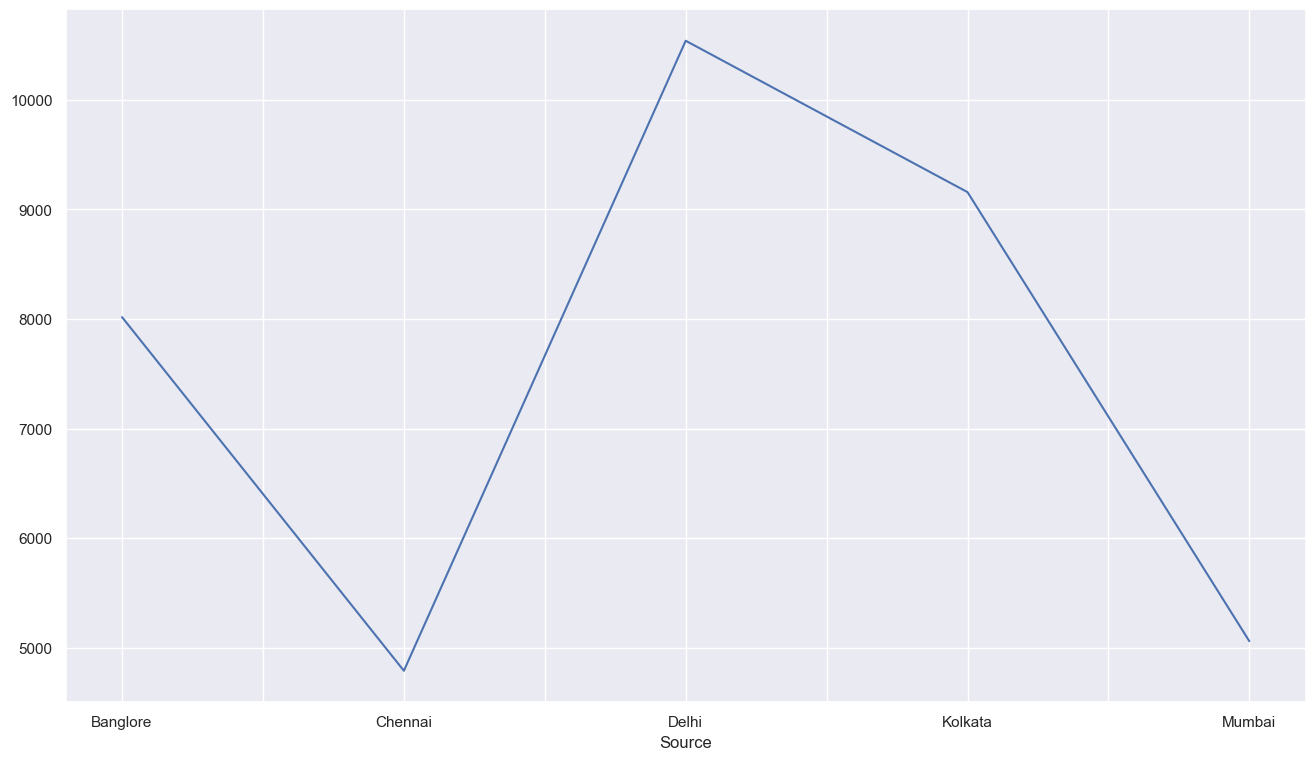

In [33]:
df.groupby('Source')['Price'].mean().plot(figsize=(16,9))

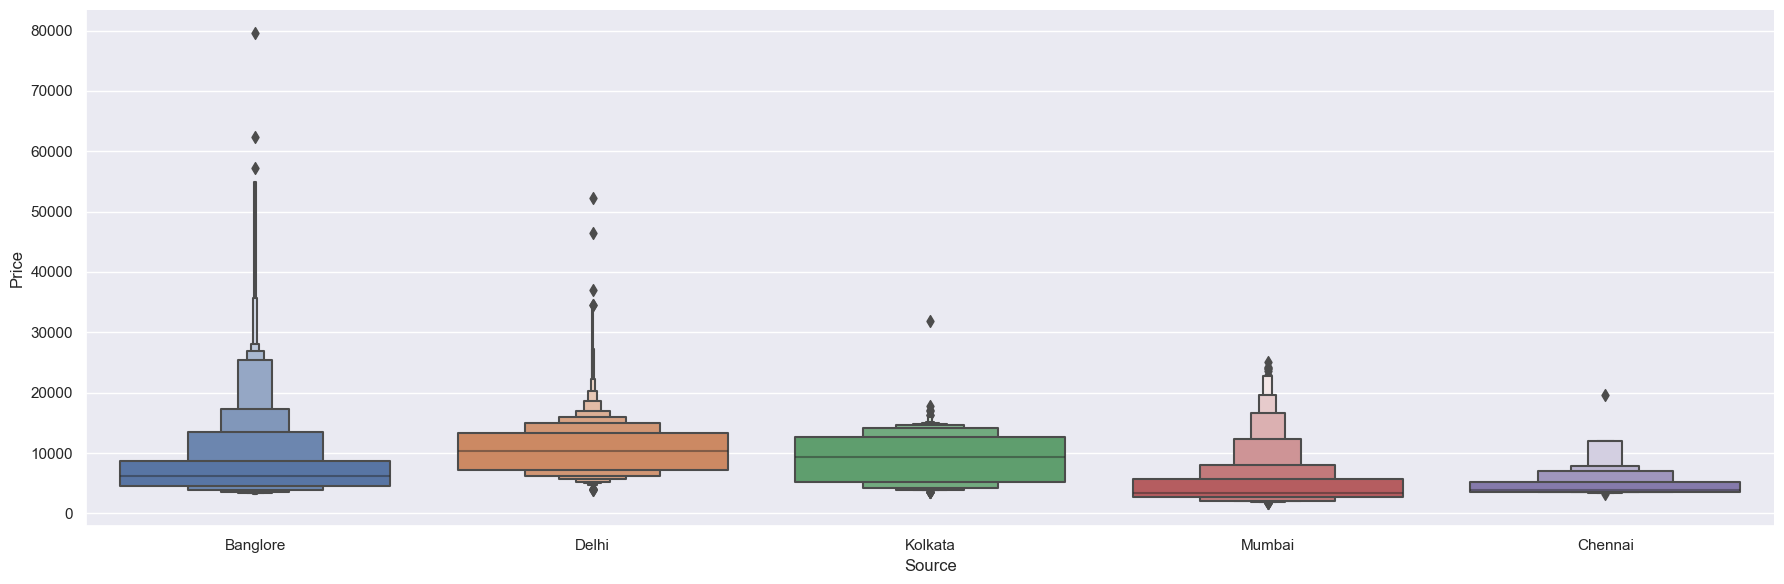

In [34]:
sns.catplot(y= 'Price' , x = 'Source', data= df.sort_values('Price',ascending= False), kind="boxen", height = 6, aspect =3 )
plt.show()

* Same thing happen in the source so we also do the OneHt encoding

In [35]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)

In [36]:
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


* That means Destination also effect the price so we also do the OneHot encoding on that too

In [37]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [38]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)

In [39]:
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [40]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


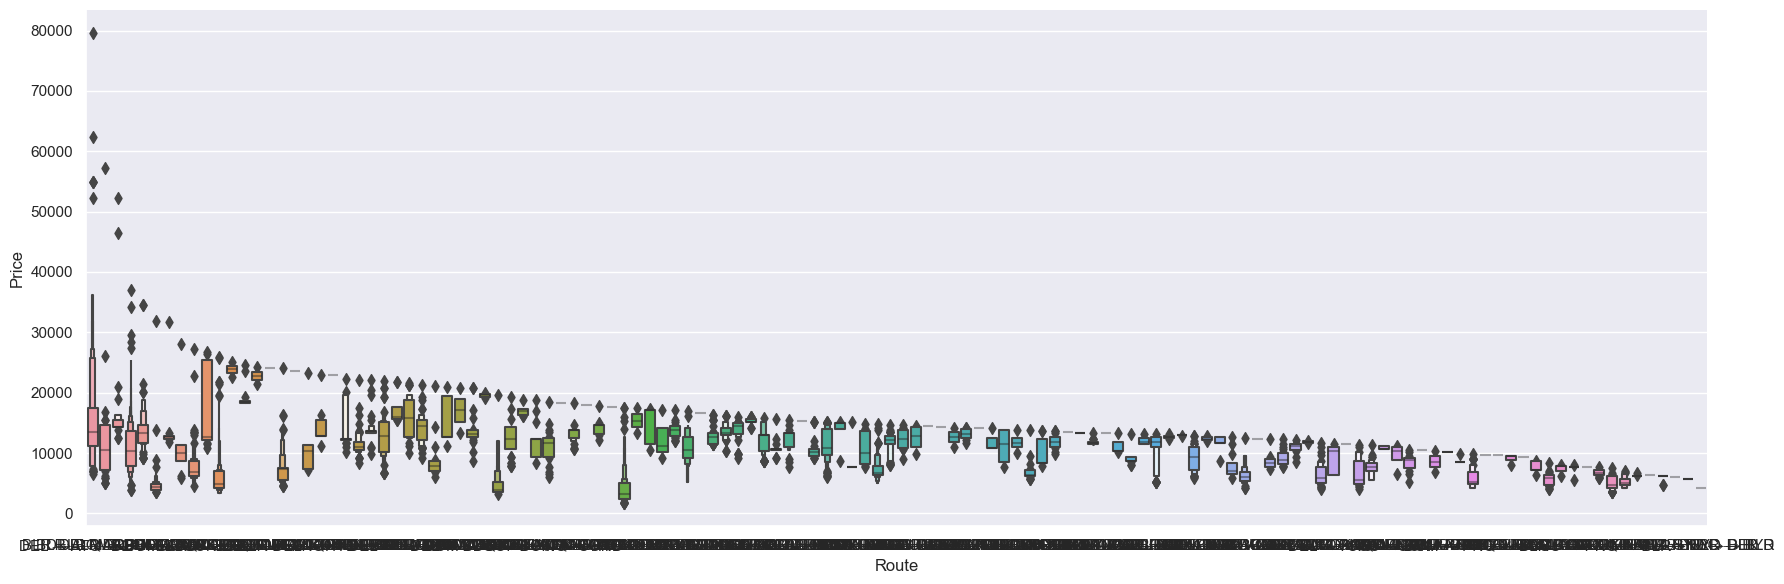

In [41]:
sns.catplot(y= 'Price' , x = 'Route', data= df.sort_values('Price',ascending= False), kind="boxen", height = 6, aspect =3 )
plt.show()

###  From above graph we can see that there is no any major impact on price
* Hence we will drop the columns

In [42]:
df.drop('Route',axis=1,inplace=True)

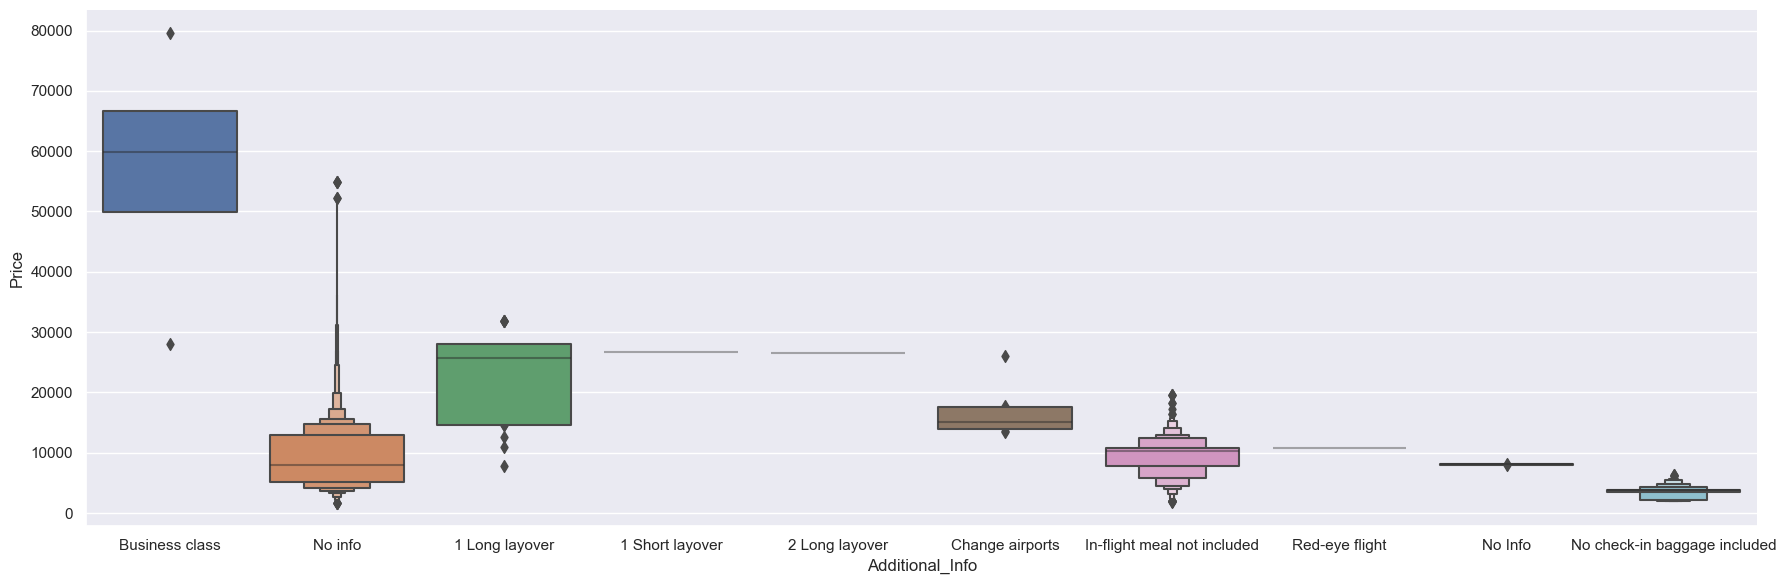

In [43]:
sns.catplot(y= 'Price' , x = 'Additional_Info', data= df.sort_values('Price',ascending= False), kind="boxen", height = 6, aspect =3 )
plt.show()

In [44]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

* In Addiotional_info the price are change with facility but the price column is not directly depend on Additional_info
* So, for that reason we will do labal encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoding = LabelEncoder()

In [46]:
df1= labelencoding.fit_transform(df['Additional_Info'])

In [47]:
Encoded_Additional_Info = pd.DataFrame(df1,columns=['Encoded_Additional_Info'])

In [48]:
Encoded_Additional_Info

,Encoded_Additional_Info
0,8
1,8
2,8
3,8
4,8
...,...
10677,8
10678,8
10679,8
10680,8


### Now we will see the Total_Stops with price

In [49]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot: xlabel='Total_Stops'>

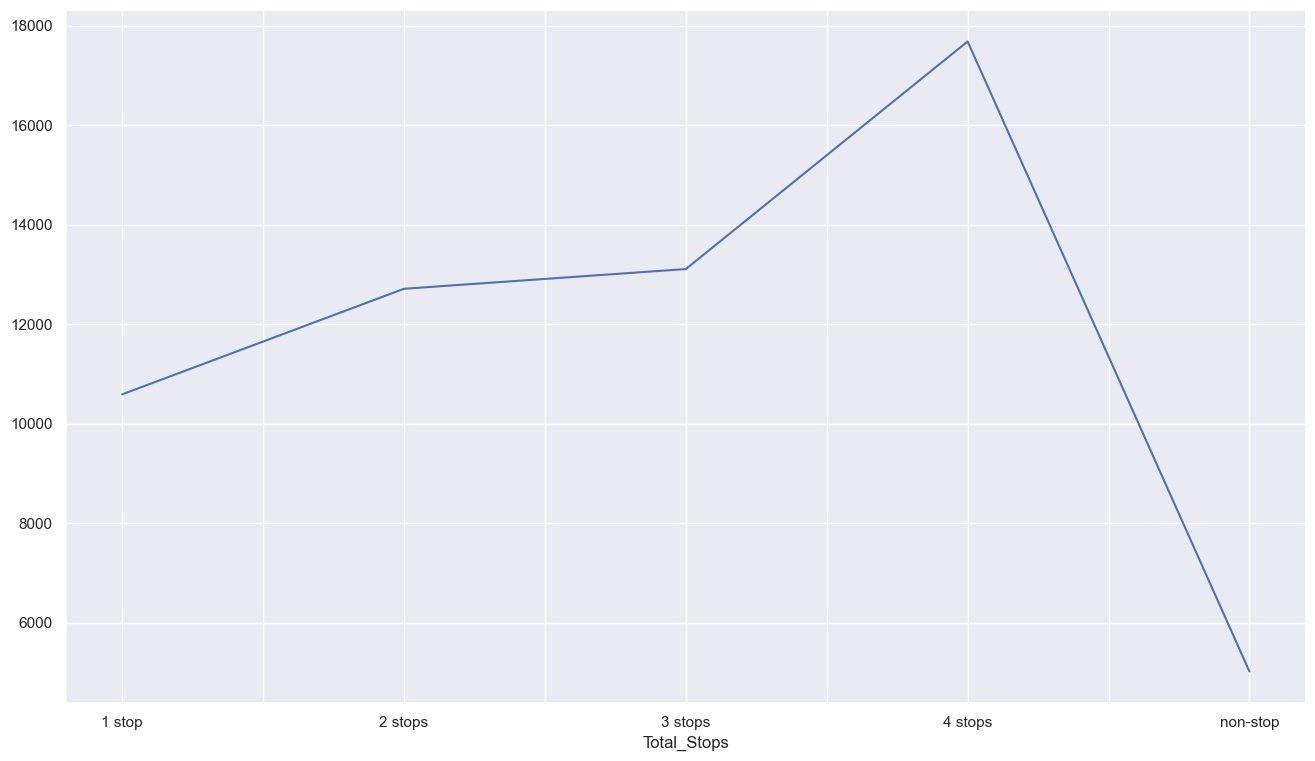

In [50]:
df.groupby('Total_Stops')['Price'].mean().plot(figsize=(16,9))

<function matplotlib.pyplot.show(close=None, block=None)>

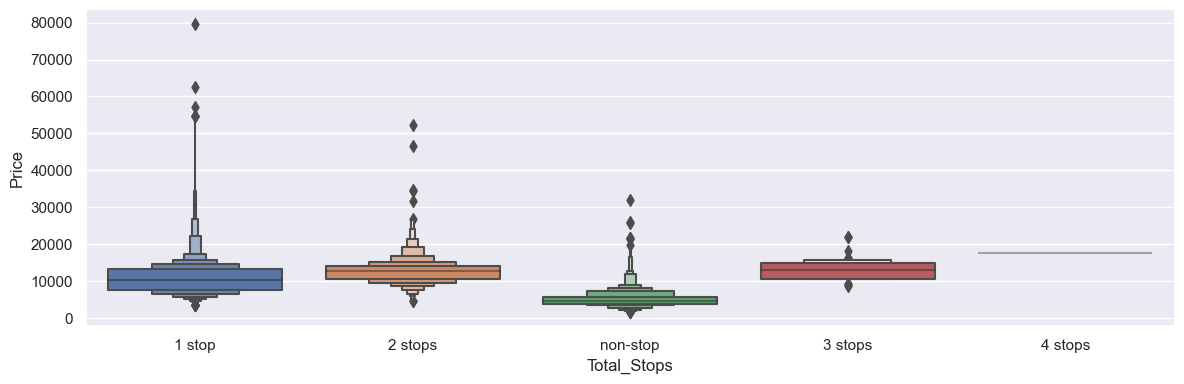

In [51]:
sns.catplot(y='Price', x = 'Total_Stops', data = df.sort_values('Price',ascending= False),kind='boxen',height=4,aspect=3)
plt.show


* This column are in order so we will replace the value with numerical column

In [52]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
df.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


# Now we will joint(concatenate) all dummy column into our main data frame for machine learning pridiction

* Our dummy data are Airline, Source, Destination and Encoded_Additional_Info

In [55]:
df = pd.concat([df,Airline, Source, Destination, Encoded_Additional_Info],axis=1)

In [56]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_Hour,Dep_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Encoded_Additional_Info
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24.0,3.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1.0,5.0,5.0,50.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9.0,6.0,9.0,25.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12.0,5.0,18.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1.0,3.0,16.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Air India,Kolkata,Banglore,0.0,No info,4145.0,27.0,4.0,20.0,45.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
10680,Jet Airways,Banglore,Delhi,0.0,No info,7229.0,27.0,4.0,8.0,20.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0
10681,Vistara,Banglore,New Delhi,0.0,No info,12648.0,1.0,3.0,11.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
10682,Air India,Delhi,Cochin,2.0,No info,11753.0,9.0,5.0,10.0,55.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


In [57]:
df.isnull().sum()

Airline                                      1
Source                                       1
Destination                                  1
Total_Stops                                  1
Additional_Info                              1
Price                                        1
journy_day                                   1
journy_month                                 1
Dep_Hour                                     1
Dep_Minute                                   1
Arr_Hour                                     1
Arr_Minute                                   1
Duration_hour                                1
Duration_minute                              1
Airline_Air India                            1
Airline_GoAir                                1
Airline_IndiGo                               1
Airline_Jet Airways                          1
Airline_Jet Airways Business                 1
Airline_Multiple carriers                    1
Airline_Multiple carriers Premium economy    1
Airline_Spice

In [58]:
df.dropna(inplace=True)

##  Now Categorical columns from main data

In [59]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journy_day,journy_month,Dep_Hour,Dep_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Encoded_Additional_Info
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24.0,3.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1.0,5.0,5.0,50.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9.0,6.0,9.0,25.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12.0,5.0,18.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1.0,3.0,16.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0


In [60]:
df.drop(['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

## Now we have clean the whole data and it is ready for prediction 

In [61]:
df.head()

,Total_Stops,Price,journy_day,journy_month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hour,Duration_minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Encoded_Additional_Info
0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
3,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0


#  Now we will assign the Predictor and Target

In [62]:
X = df.drop('Price',axis=1)
y = df['Price']

## Now we will see the Co-relation between all the attributes 

C:\Users\bhaum\AppData\Local\Temp\ipykernel_9008\2138019070.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')


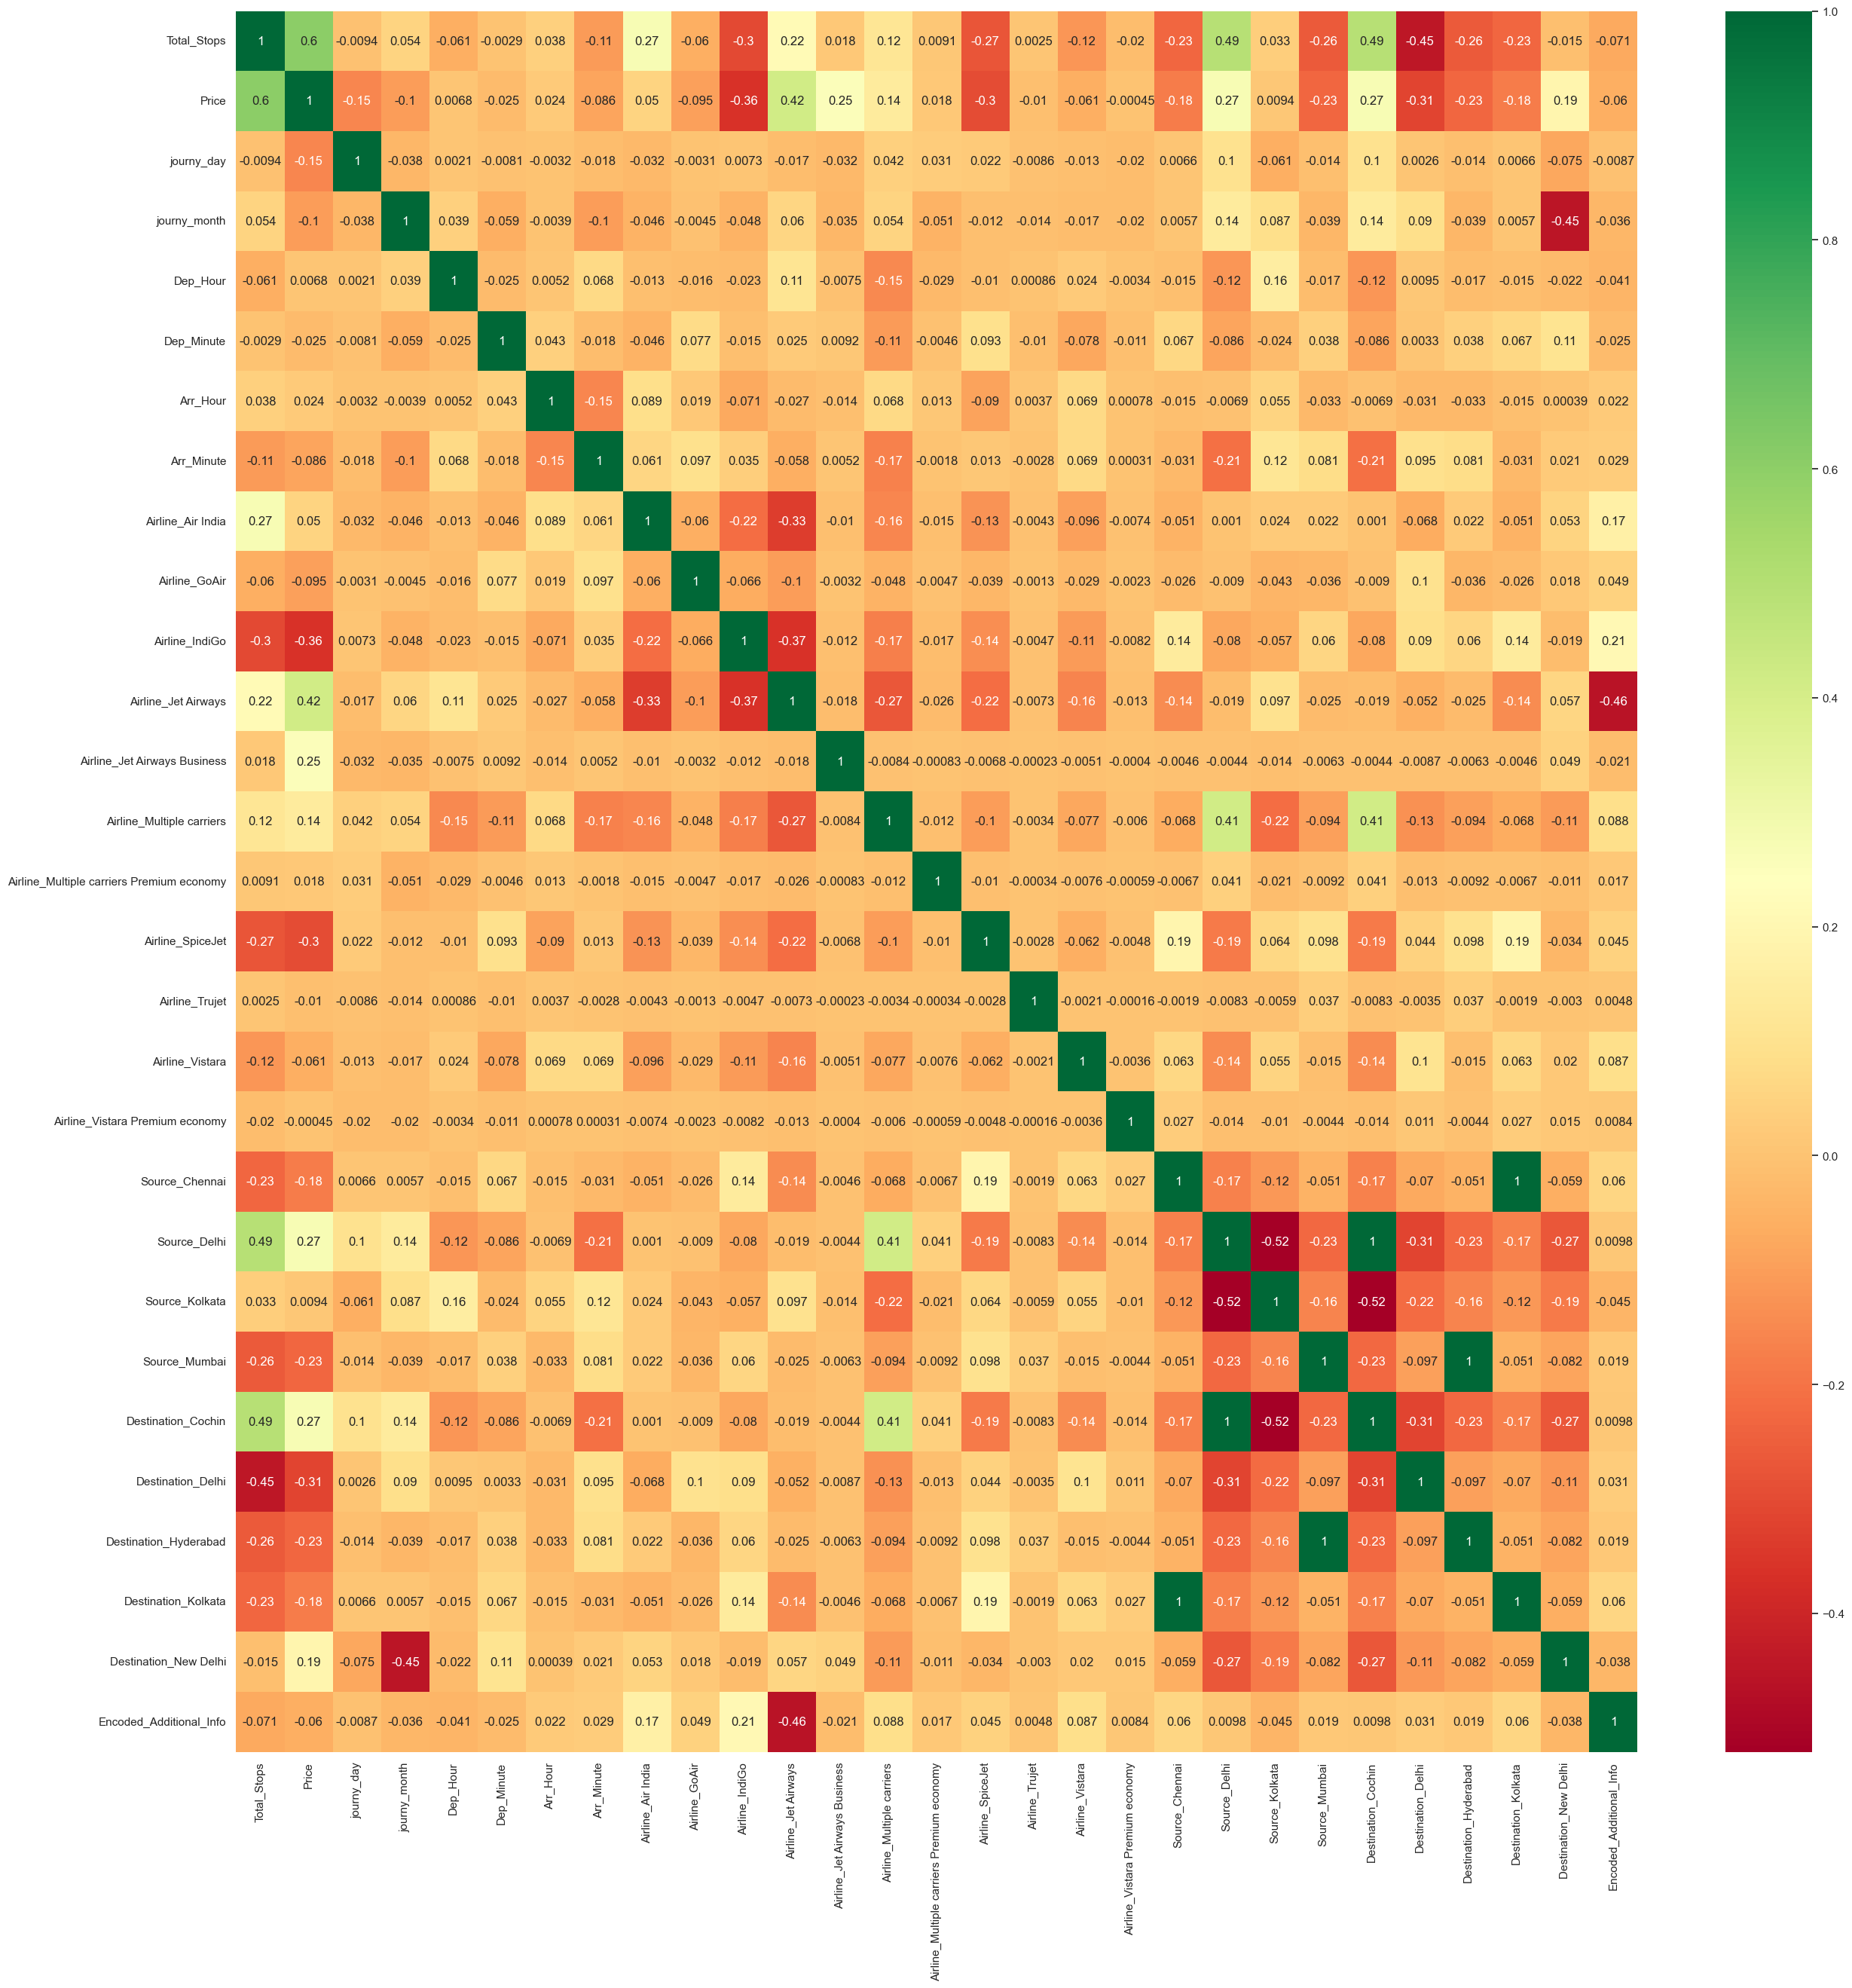

In [63]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

## Find the important Feature using ExtraTreesRegressor

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[2.24522283e-01 1.13880078e-01 5.26329624e-02 2.20782738e-02
 1.99801556e-02 2.51409162e-02 1.64912909e-02 1.14405931e-01
 1.59381259e-02 8.22548176e-03 1.77583397e-03 1.74650864e-02
 1.34318984e-01 6.52074622e-02 1.94063692e-02 8.39925099e-04
 2.99725268e-03 1.24957991e-04 4.83306656e-03 7.76803285e-05
 5.15998555e-04 1.24898799e-02 4.18458213e-03 7.51542185e-03
 5.93919419e-03 1.72701884e-02 6.29149961e-03 5.59404276e-04
 2.44728253e-02 6.04188891e-02]


### plot graph of feature importances for better visualizationm

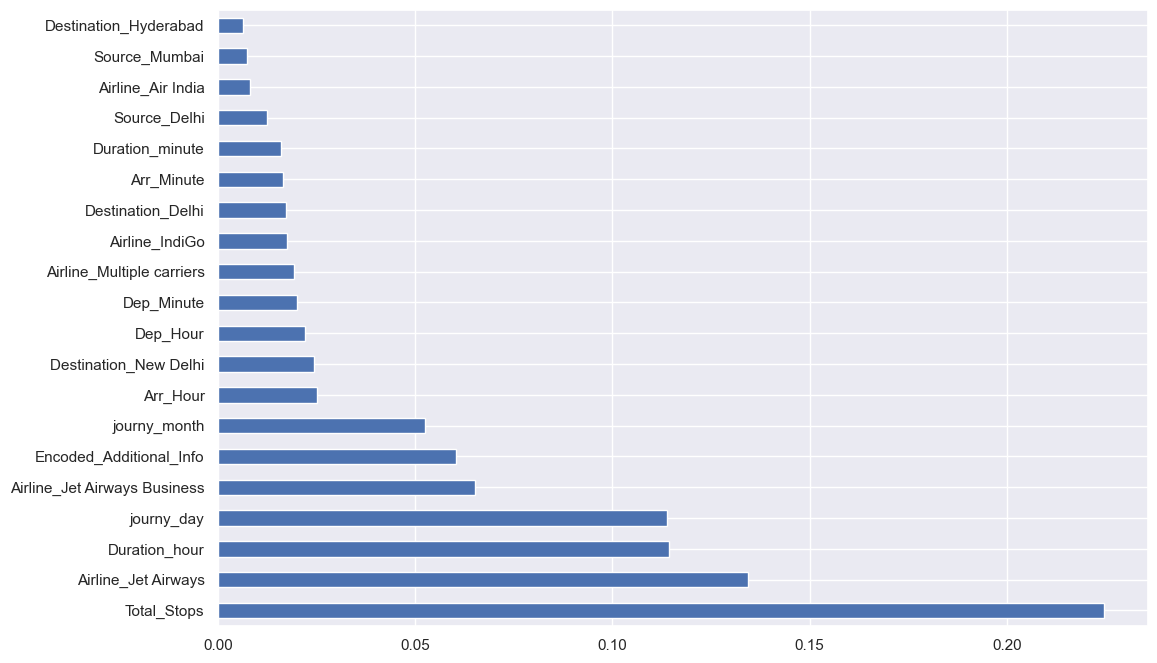

In [66]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

* As you can see that Total_stops are highly affect to price and follow by the other attribute

###  Now we will Creating Traning and Testing data

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

* First of all we will try Linear regration method

In [68]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

##  Now printing the traning and testing accuracy

In [69]:
LR.score(X_train,y_train)

0.6512107425156932

In [70]:
LR.score(X_test,y_test)

0.6161776570563609

### As you can see the traning asd testing accuracy score are low

* for that we will run all the possible algorithem in single time and check hightest accuracy result

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [72]:
model = [DecisionTreeRegressor(),RandomForestRegressor(random_state=42),KNeighborsRegressor(),SVR(),AdaBoostRegressor()]

In [73]:
for i in model:
    Regration = i
    Regration = Regration.fit(X_train,y_train)
    print(i,'Model_score',Regration.score(X_test,y_test))

DecisionTreeRegressor() Model_score 0.8092587038275817
RandomForestRegressor(random_state=42) Model_score 0.8801176903258118
KNeighborsRegressor() Model_score 0.5732727024186908
SVR() Model_score 0.005863729965792541
AdaBoostRegressor() Model_score 0.26964493467822914


## Here we see RandomForestRegressor gives us best score so we can use RandomForest Regressor algorithm

In [74]:
from sklearn.ensemble import RandomForestRegressor
RR = RandomForestRegressor(random_state=42)
RR.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_pred = RR.predict(X_test)

In [76]:
RR.score(X_train,y_train)

0.9760029007875555

In [77]:
RR.score(X_test,y_test)

0.8801176903258118

## Perform Hyper-prameter tuning using RandomizedSearchCV

In [78]:
from sklearn.model_selection import RandomizedSearchCV

* select the possible perameter for incresing prediction

In [79]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1500, num = 12)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
max_features=['auto','sqrt']

In [80]:
random_grid = {'n_estimators':n_estimators,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_depth':max_depth,
               'max_features':max_features}

## Random search of parameters, using 5 fold cross validation and  search across 100 different combinations

In [86]:

rf_random = RandomizedSearchCV(estimator = RR, 
                               param_distributions =random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 1, cv = 3,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [87]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1118; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1118; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1118; total time=   6.5s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=1, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 227, 354, 481,
                                                         609, 736, 863, 990,
                                                         1118, 1245, 1372,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
rf_random.best_params_     # if we apply this perameter the result will decresed so it not all time sutable for all data

{'n_estimators': 1118,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

## Compare y_test and y_pred value with graphical way

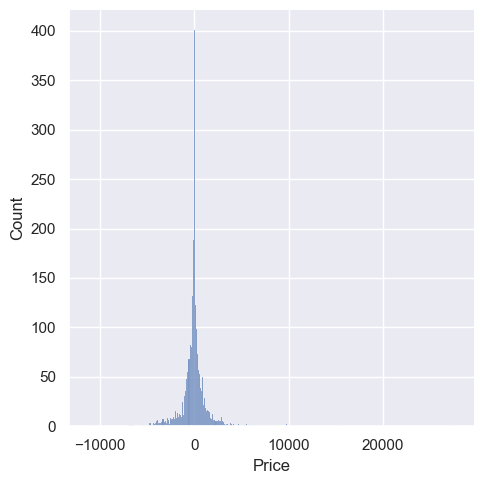

In [89]:
sns.displot(y_test-y_pred)
plt.show()

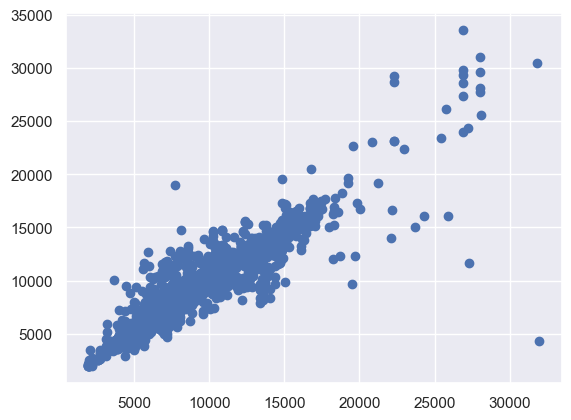

In [90]:
plt.scatter(y_test,y_pred,alpha=1)
plt.xlabel = ('y_test')
plt.ylabel = ('y_pred')
plt.show()

### model evolution

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

## check mean_absolute_error

In [92]:
mean_absolute_error(y_test,y_pred)

789.2882307455192

## check mean_squared_error

In [93]:
mean_squared_error(y_test,y_pred)

2344366.017056657